In [11]:
# Librerías 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
print ("Librerías listas, puede continuar.")

Librerías listas, puede continuar.


In [12]:
# Cargamos el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [13]:
# Dimensiones
imagen = train_images[0]
No_imagenes_train = len (train_images)
No_imagenes_test = len (test_images)
print(f"Dimensiones de la imagen: {imagen.shape}", "\n",
      "Cantidad de imágenes en Train:", No_imagenes_train, "\n",
      "Cantidad de imágenes en Test:", No_imagenes_test, "\n",
      )

Dimensiones de la imagen: (28, 28) 
 Cantidad de imágenes en Train: 60000 
 Cantidad de imágenes en Test: 10000 



In [14]:
# Redimesionamiento y normalización de las imágenes
train_images = train_images.reshape((60000, 28 * 28)) # 28*28 = 784
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Conversión one-hot 
train_labels = to_categorical(train_labels) # 1 = [0,1,0,0,0,0,0,0,0,0,]
test_labels = to_categorical(test_labels)

In [15]:
# Creación del modelo [784, 24, 10]
model = models.Sequential()
model.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(24, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

c:\Users\jltg_\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compilar el modelo
custom_optimizer = Adam(learning_rate=0.0001, beta_1=0.95, beta_2=0.999, epsilon=1e-10)

model.compile(optimizer = custom_optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
# Entrenar el modelo
checkpoint_mejor_modelo = ModelCheckpoint("Modelo2.keras", monitor="val_loss", save_best_only=True)
history = model.fit(train_images, train_labels, 
                    epochs=30, 
                    callbacks=[checkpoint_mejor_modelo],
                    batch_size=10, validation_split=0.2)

Epoch 1/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 55s 10ms/step - accuracy: 0.6100 - loss: 1.5292 - val_accuracy: 0.8942 - val_loss: 0.4765
Epoch 2/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - accuracy: 0.8945 - loss: 0.4518 - val_accuracy: 0.9181 - val_loss: 0.3263
Epoch 3/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.9148 - loss: 0.3315 - val_accuracy: 0.9298 - val_loss: 0.2709
Epoch 4/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 53s 11ms/step - accuracy: 0.9294 - loss: 0.2706 - val_accuracy: 0.9374 - val_loss: 0.2386
Epoch 5/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - accuracy: 0.9346 - loss: 0.2446 - val_accuracy: 0.9421 - val_loss: 0.2171
Epoch 6/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - accuracy: 0.9421 - loss: 0.2148 - val_accuracy: 0.9465 - val_loss: 0.2001
Epoch 7/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 48s 10ms/step - accuracy: 0.9467 - loss: 0.1958 - val_accuracy: 0.9503 - val_loss: 0.1874
Epoch 8/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.9510 - 

In [19]:
# Evaluación el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9673 - loss: 0.1057
Precisión en el conjunto de prueba: 0.9710000157356262


<function matplotlib.pyplot.show(close=None, block=None)>

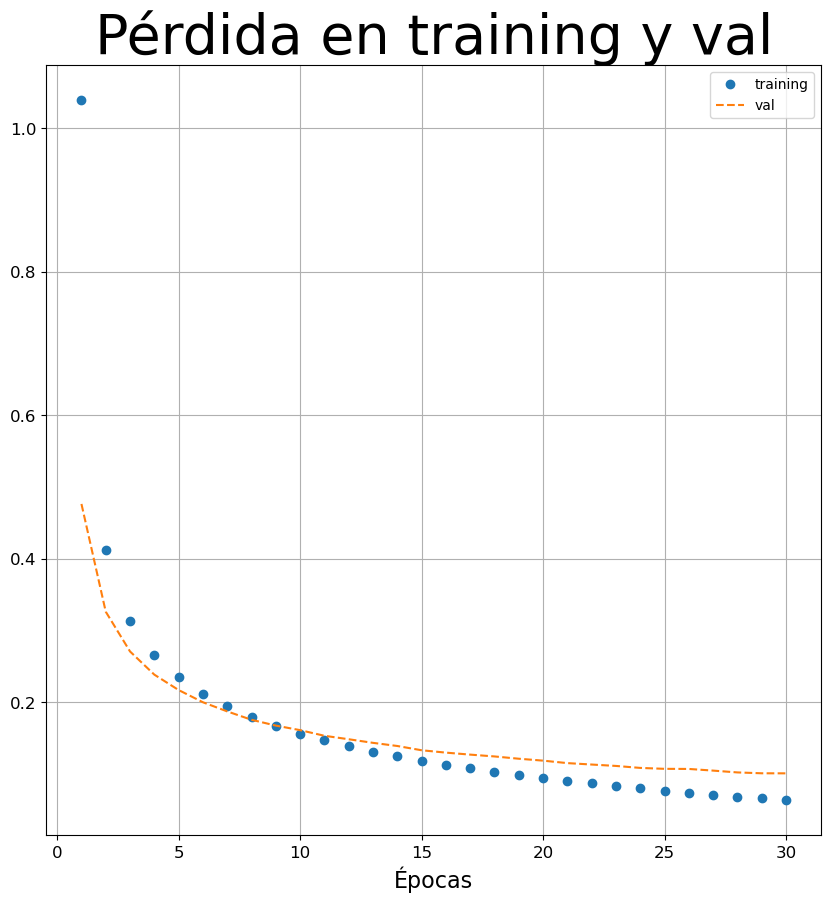

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Gráfica 
fig = plt.figure(figsize=(10,10))

epoch = range(1,len(loss_values)+1)

plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')

# Ejes
plt.ylabel("Pérdida", fontsize = 16)
plt.xlabel("Épocas", fontsize = 16)
plt.title("Pérdida en training y val", fontsize = 40)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize= 10)
plt.grid(True)
plt.savefig("Modelo3.png")
plt.show